In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happy-face/happy_image.jpg
/kaggle/input/emotion-images/fer2013.csv


Using the dataset provided by Kaggle website, which consists of about 35,887 well structured 48 × 48 pixel gray-scale images of faces.

In [4]:
df=pd.read_csv('/kaggle/input/emotion-images/fer2013.csv') #Dataframe Creation

In [5]:
df.shape

(35887, 3)

The dataframe consist of 35887 rows and 3 columns

In [6]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

The given images are divided into three different sets which are training,validation, and test sets. There are about 28,709 training images, 3589 validation images, and 3589 images for testing.

In [8]:
n_train,n_val,n_test = df['Usage'].value_counts()

Target labels(0-7) corresponds to one of the emotions. The emotion names are stored in a list at corresponding indices

In [9]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

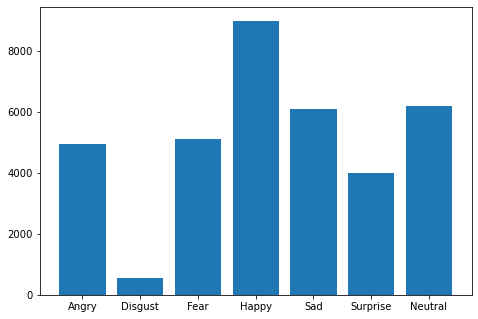

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(emotions,df['emotion'].value_counts(sort=False))
plt.show()

In [11]:
data=df.values
data[0,0]

0

In [12]:
y=data[:,0]
pixels=data[:,1]
pixels[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [13]:
pixels.shape

(35887,)

Converting pixels represented using a string to 48x48 integers 

In [14]:
x=np.zeros((pixels.shape[0],48*48))
for i in range(pixels.shape[0]):
  image=pixels[i].split()
  for j in range(x.shape[1]):
    x[i,j]=int(image[j])

In [15]:
x

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [16]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

label: 4 emotion: Sad


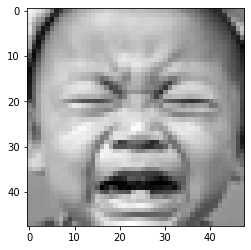

In [17]:
plt.imshow(x[130].reshape((48, 48)), interpolation='none', cmap='gray')
print('label:',y[130],'emotion:',emotions[y[130]])

Normalize the values to range from 0 to 1

In [18]:
x=x/255

Splitting the dataset into train,validation and test sets

In [19]:
x_train = x[0:n_train]
y_train = y[0:n_train]
x_val = x[n_train:n_train+n_val]
y_val = y[n_train:n_train+n_val]
x_test = x[n_train+n_val:n_train+n_val+n_test]
y_test = y[n_train+n_val:n_train+n_val+n_test]

In [20]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(28709, 2304) (28709,)
(3589, 2304) (3589,)
(3589, 2304) (3589,)


In [21]:
from keras.utils import np_utils

Reshaping input images to 48x48x1.

In [22]:
x_train = np.array(x_train).reshape(-1,48,48,1)
x_val = np.array(x_val).reshape(-1,48,48,1)
x_test = np.array(x_test).reshape(-1,48,48,1)
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [23]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(28709, 48, 48, 1) (28709, 7)
(3589, 48, 48, 1) (3589, 7)
(3589, 48, 48, 1) (3589, 7)


In [24]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score

Model 1


In [25]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
model1.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model1.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model1.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(7 , activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

In [26]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 96)        5

In [27]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

In [28]:
history1 = model1.fit(x_train,y_train,
                    batch_size=64, steps_per_epoch=len(x_train)/64,
                    callbacks=[es],
                    validation_data=(x_val, y_val),
                    epochs = 20, verbose = 2)

Epoch 1/20
449/448 - 5s - loss: 1.8262 - accuracy: 0.2454 - val_loss: 1.7895 - val_accuracy: 0.2580
Epoch 2/20
449/448 - 5s - loss: 1.7264 - accuracy: 0.2965 - val_loss: 1.5868 - val_accuracy: 0.3767
Epoch 3/20
449/448 - 5s - loss: 1.5275 - accuracy: 0.4036 - val_loss: 1.4225 - val_accuracy: 0.4430
Epoch 4/20
449/448 - 5s - loss: 1.3947 - accuracy: 0.4637 - val_loss: 1.3263 - val_accuracy: 0.4954
Epoch 5/20
449/448 - 5s - loss: 1.2873 - accuracy: 0.5117 - val_loss: 1.2623 - val_accuracy: 0.5099
Epoch 6/20
449/448 - 5s - loss: 1.2000 - accuracy: 0.5454 - val_loss: 1.2219 - val_accuracy: 0.5311
Epoch 7/20
449/448 - 5s - loss: 1.1126 - accuracy: 0.5800 - val_loss: 1.2129 - val_accuracy: 0.5453
Epoch 8/20
449/448 - 5s - loss: 1.0295 - accuracy: 0.6144 - val_loss: 1.2291 - val_accuracy: 0.5464
Epoch 9/20
449/448 - 5s - loss: 0.9448 - accuracy: 0.6484 - val_loss: 1.2701 - val_accuracy: 0.5464
Epoch 10/20
449/448 - 5s - loss: 0.8521 - accuracy: 0.6857 - val_loss: 1.3168 - val_accuracy: 0.5391

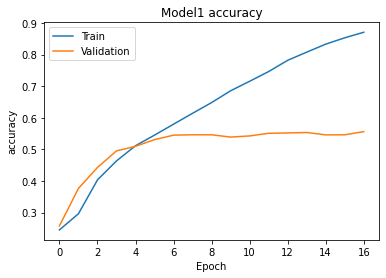

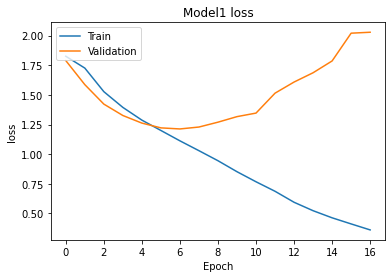

In [29]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])

plt.plot(history1.history['val_loss'])
plt.title('Model1 loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
test_true1 = np.argmax(y_test,axis=1)
test_pred1 = np.argmax(model1.predict(x_test), axis=1)
accuracy_score(test_true1,test_pred1)

0.5572582892170521

For the training process of model 1, all of the images in the training set were used with 30 epochs and a batch size of 64 and callback as early stopping. The best first model gave 57% accuracy on the validation set and 56.5% on the test set.

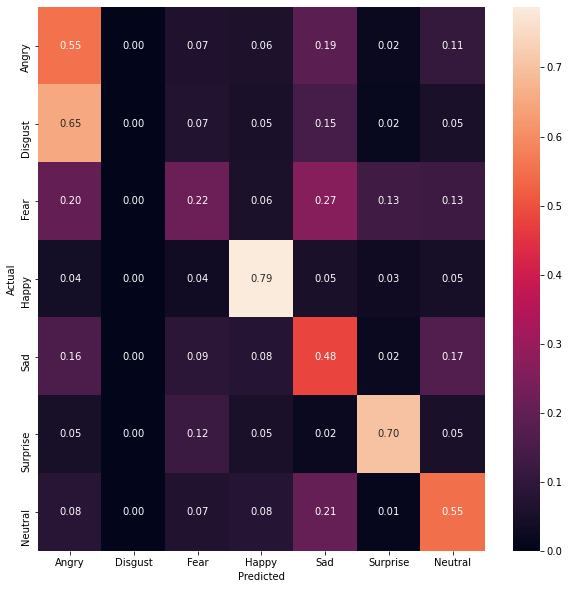

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_true1, test_pred1)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=emotions, yticklabels=emotions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

Model 2

In [32]:
model2 = Sequential()
input_shape = (48,48,1)
model2.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model2.add(Conv2D(32, (3, 3),activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model2.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model2.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model2.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.4))
model2.add(Dense(7))
model2.add(Activation('softmax'))
  
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

In [34]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [35]:
history2 = model2.fit(x_train,y_train,
                    batch_size=64, steps_per_epoch=len(x_train)/64,
                    callbacks=[lr_reduce],
                    validation_data=(x_val, y_val),
                    epochs = 20, verbose = 2)

Epoch 1/20
449/448 - 6s - loss: 1.7965 - accuracy: 0.3236 - val_loss: 1.9120 - val_accuracy: 0.2218
Epoch 2/20
449/448 - 5s - loss: 1.3552 - accuracy: 0.4832 - val_loss: 1.3387 - val_accuracy: 0.4728
Epoch 3/20
449/448 - 5s - loss: 1.1870 - accuracy: 0.5528 - val_loss: 1.3075 - val_accuracy: 0.5132
Epoch 4/20
449/448 - 5s - loss: 1.0830 - accuracy: 0.5929 - val_loss: 1.2485 - val_accuracy: 0.5294
Epoch 5/20
449/448 - 5s - loss: 0.9952 - accuracy: 0.6294 - val_loss: 1.1131 - val_accuracy: 0.5759
Epoch 6/20

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
449/448 - 5s - loss: 0.9101 - accuracy: 0.6595 - val_loss: 1.1907 - val_accuracy: 0.5687
Epoch 7/20
449/448 - 5s - loss: 0.6973 - accuracy: 0.7492 - val_loss: 1.0149 - val_accuracy: 0.6233
Epoch 8/20
449/448 - 5s - loss: 0.5856 - accuracy: 0.7966 - val_loss: 1.0400 - val_accuracy: 0.6258
Epoch 9/20

Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
449/448 - 5s - loss: 0.49

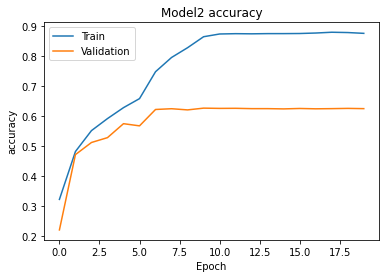

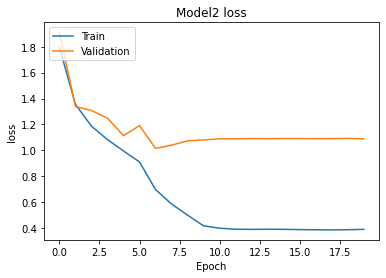

In [36]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])

plt.plot(history2.history['val_loss'])
plt.title('Model2 loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [37]:
test_true2 = np.argmax(y_test,axis=1)
test_pred2 = np.argmax(model2.predict(x_test), axis=1)
accuracy_score(test_true2,test_pred2)

0.636110337141265

For the training process of model 2, all of the images in the training set were used with 20 epochs and a batch size of 64 and callback as reduce lr on plateau. The best second model gave us 63% accuracy on the validation set and 63% on the test set.

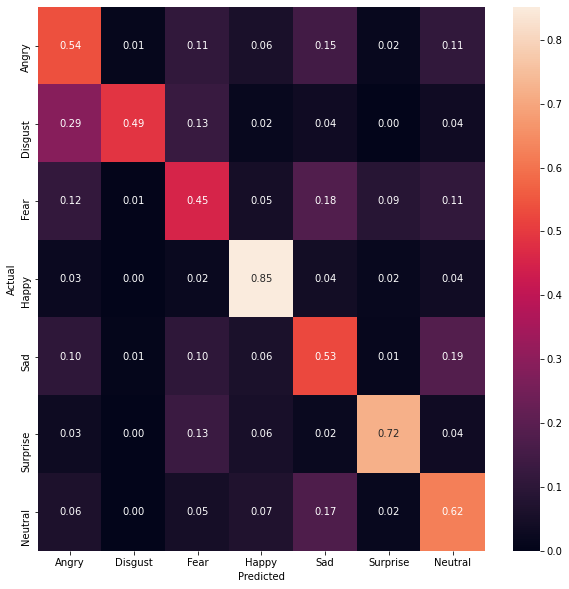

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_true2, test_pred2)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=emotions, yticklabels=emotions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

Test input

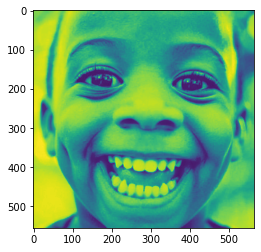

In [40]:
import cv2
features= cv2.imread('/kaggle/input/happy-face/happy_image.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(features)

In [41]:
features_n= cv2.resize(features, (48, 48))
features_n= np.expand_dims(features_n, axis=-1)
features_n=features_n/255
features_n= np.expand_dims(features_n, axis=0)
features_n.shape


(1, 48, 48, 1)

In [42]:
print("Model1 prediction:", emotions[np.argmax(model1.predict(features_n))])
print("Model2 prediction:", emotions[np.argmax(model2.predict(features_n))])

Model1 prediction: Happy
Model2 prediction: Happy
